# 1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

The main motivations for reducing a dataset's dimensionality are the following:
* Speed up the training process, as the number of dimensionality is lower.
* Filtering out some noise inside the dataset.
* DataViz purposes (finding patterns, presenting results to a non technical audience,etc.) where the dataset has to be represent into a chart, where the lower the number of dimensionality, the better it is.

The main drawbacks are:
* The loss of information inside the dataset and thus the (slight) drop in performance in the model.
* The increase complexity of the pipeline because of the dimensionality reduction and therefore the difficulty to maintain it.

# 2. What is the curse of dimensionality?

Machine Learning problems involve thousands or even millions of features for each training instance. Not only do all these features make training extremely slow, but they can make it harder to find a good solution. This problem is ofter referred to as the ***curse of dimensionality***.

# 3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Yes, once a dataset's dimensionality has been reduced, it is possible to reserve the operation. Since the PCA uses projections to reduce dimensionality, it is possible to get the inverse transformation to get back the original dataset. However, this won't give us back the original data, since the projection lost a bit of information (within the % variance that was dropped), but it will likely be close to the original data. The mean squared distance between the original data and the reconstructed data (compressed than decompressed) is called the *reconstruction error*.
In scikit-learn, the operation is done with the *inverse_transform* class.

# 4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, it is possible with a kernel PCA (kPCA). This technique will map instance in the *feature space* enabling nonlinear decision boundary in the *original space* to be a linear decision boundary in a the *feature space*.

# 5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

The resulting dataset will have <1000 dimensions and will have n-dimension that represents 95% of the variance explained in the dataset.

# 6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA,or Kernel PCA?

vanilla PCA:
* When the dimensionality of a dataset is too high, which makes the training too slow.

Incremental PCA:
* When the dataset is too big to fit on the memory and to make online prediction,on the fly, when new training instances arrive, because the it will split the training set into mini-batches.

Randomized PCA:
* To quickly find an approximation of the first d principal components.

Kernel PCA:
* When the dataset is highly nonlinear, and when we want to preserve clusters after projections, or even unfold twisted manifold.

# 7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Dimensionality reduction is often a preparation step for a supervised learning task (e.g. classification), so we can use grid search to select the kernel and hyperparameters that lead to the best performance on the task.

# 8. Does it make any sense to chain two different dimensionality reduction algorithms?

No, we might lose too much information between the two dimensionality reduction algorithms. The reconstruction error might be too high.

# 9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#Import algorithms
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

#Import dataset
from sklearn.datasets import fetch_openml

#Import train test split
from sklearn.model_selection import train_test_split

In [3]:
from datetime import datetime 

import time

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) #Importing the data 

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=60000)

In [6]:
import timeit

In [7]:
rf_clf = RandomForestClassifier(n_jobs=-1)

In [8]:
start_time = datetime.now() 
rf_clf.fit(X_train,y_train) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Time elapsed (hh:mm:ss.ms) 0:00:25.117340


In [9]:
accuracy_score(rf_clf.predict(X_test),y_test)

0.9685

In [10]:
pca = PCA(n_components=0.95)

In [11]:
X_pca = pca.fit_transform(X_train)

In [12]:
rf_clf = RandomForestClassifier(n_jobs=-1)

In [13]:
start_time = datetime.now() 
rf_clf.fit(X_pca,y_train)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Time elapsed (hh:mm:ss.ms) 0:00:48.801887


In [14]:
accuracy_score(rf_clf.predict(pca.transform(X_test)),y_test)

0.9519

The accuracy is slightly worse with the PCA (2.1% difference), but the training speed has been decrease by 84%!

# 10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [15]:
#import

from sklearn.manifold import TSNE,MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA

In [16]:
tsne = TSNE(n_components=2,random_state=42)
pca = PCA(n_components=2,random_state=42)
mds = MDS(n_components=2,random_state=42)
lle = LocallyLinearEmbedding(n_components=2,random_state=42)

In [17]:
split = np.random.choice(X.shape[0],size=1000) #random split of the dataset to speed up the process 

In [18]:
X[split].shape,y[split].shape

((1000, 784), (1000,))

In [19]:
X_tsne = tsne.fit_transform(X[split])
X_pca = pca.fit_transform(X[split])
X_mds = mds.fit_transform(X[split])
X_lle = lle.fit_transform(X[split])
y_1000 = y[split]

In [20]:
list_viz = [X_tsne,X_pca,X_mds,X_lle]
list_viz_str = ["tsne","pca","mds","lle"]

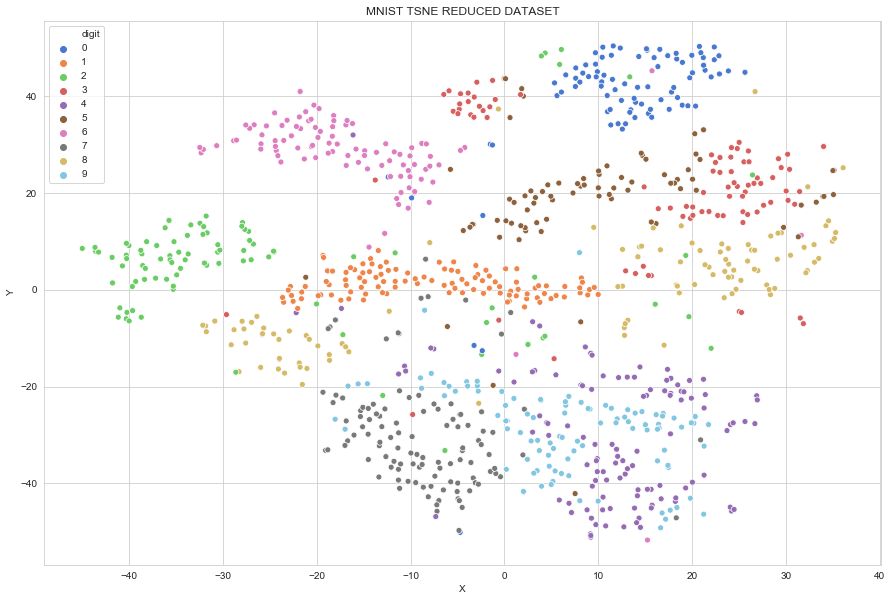

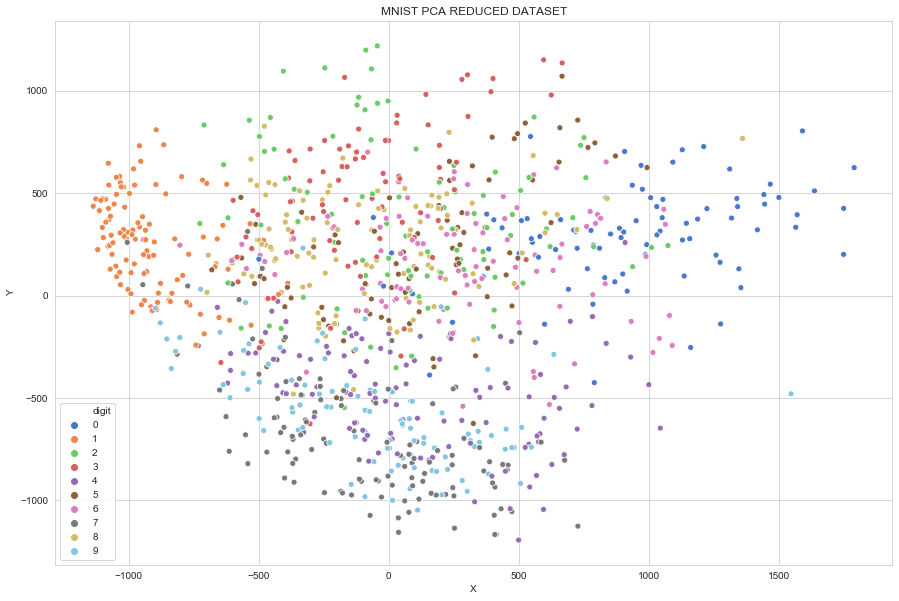

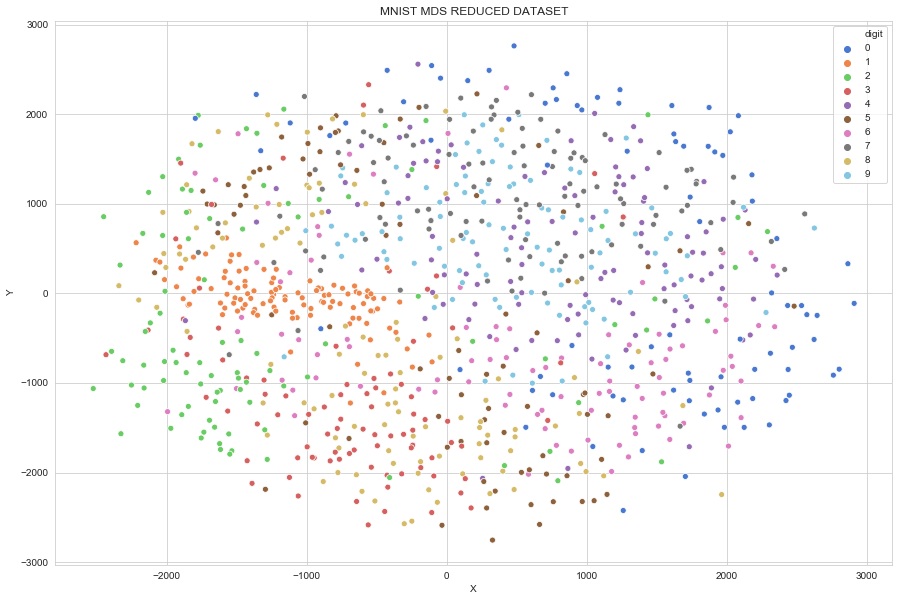

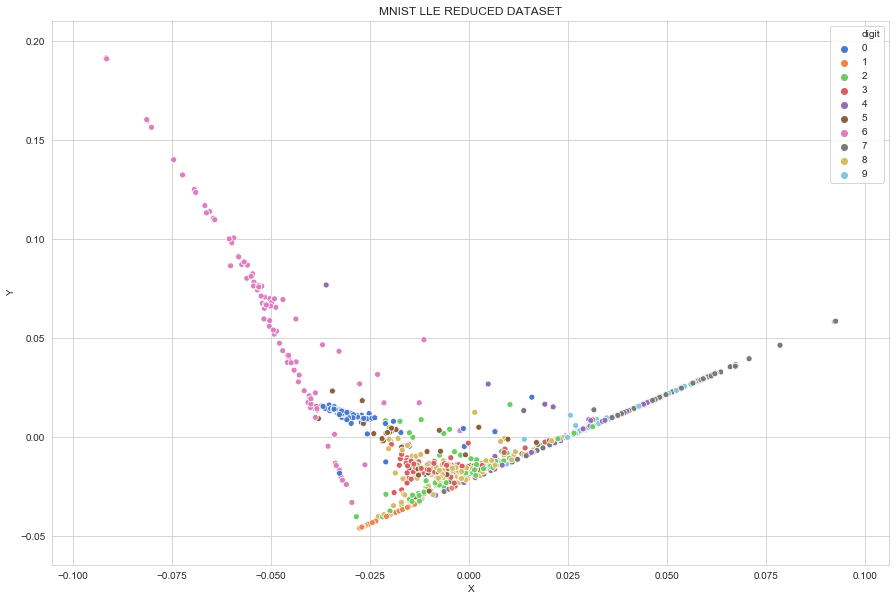

In [21]:
#with Seaborn

for i,j in zip(list_viz,list_viz_str):
    data = pd.concat([pd.DataFrame(i).rename({0:"X",1:"Y"},axis=1),pd.DataFrame(y_1000).rename({0:"digit"},axis=1)],axis=1)
    plt.figure(figsize=(15,10))
    sns.scatterplot(x="X",
                    y="Y",
                    hue="digit",
                    data=data,
                    legend="full",
                    palette="muted")
    plt.title(f"MNIST {str.upper(j)} REDUCED DATASET")
    plt.show()

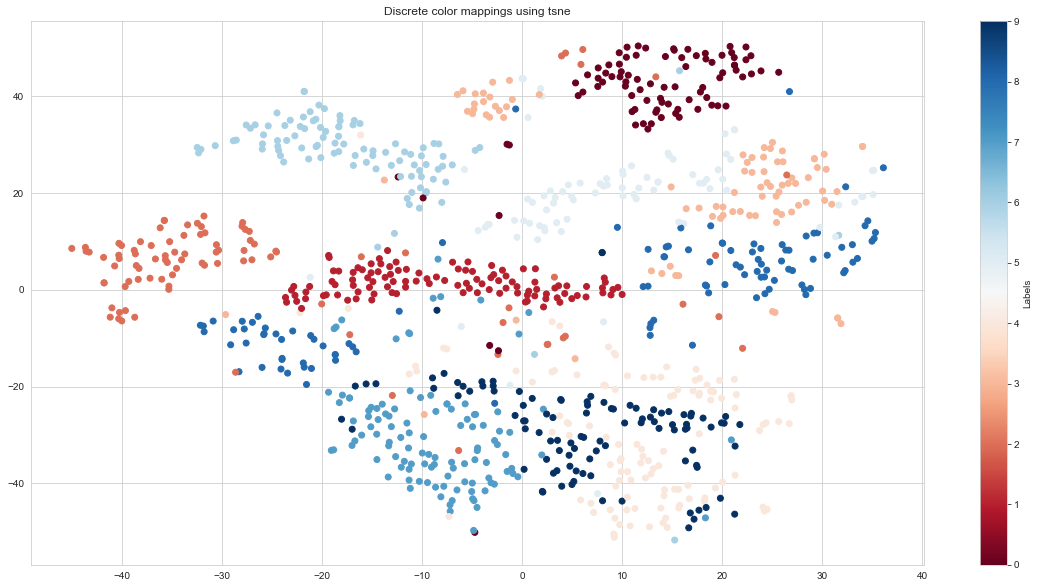

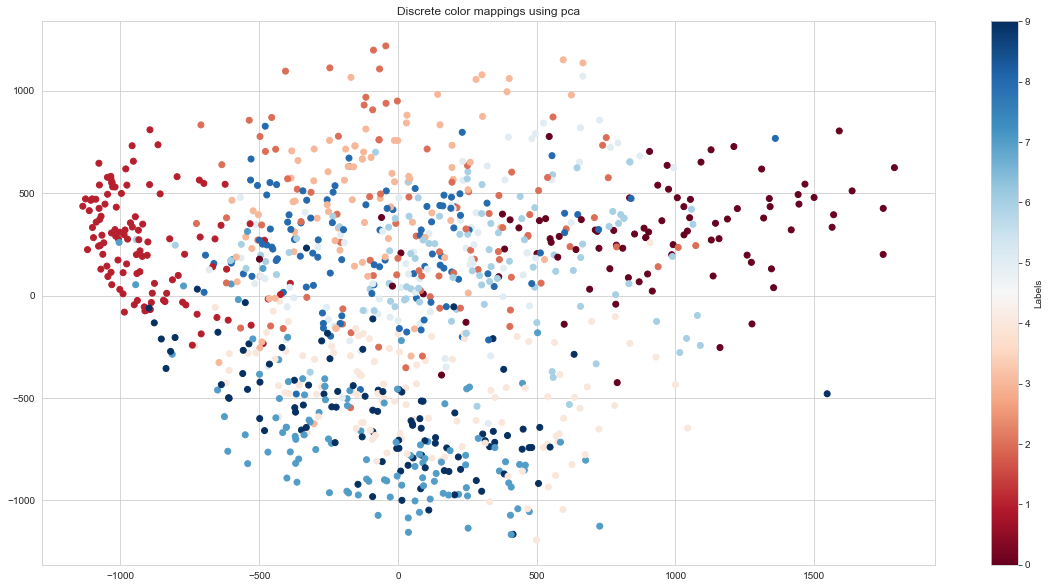

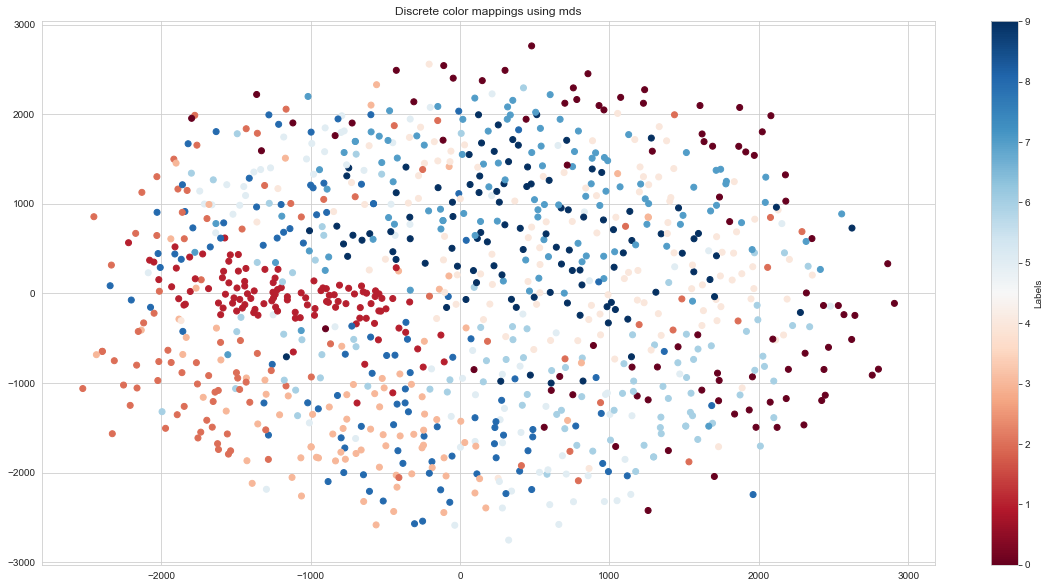

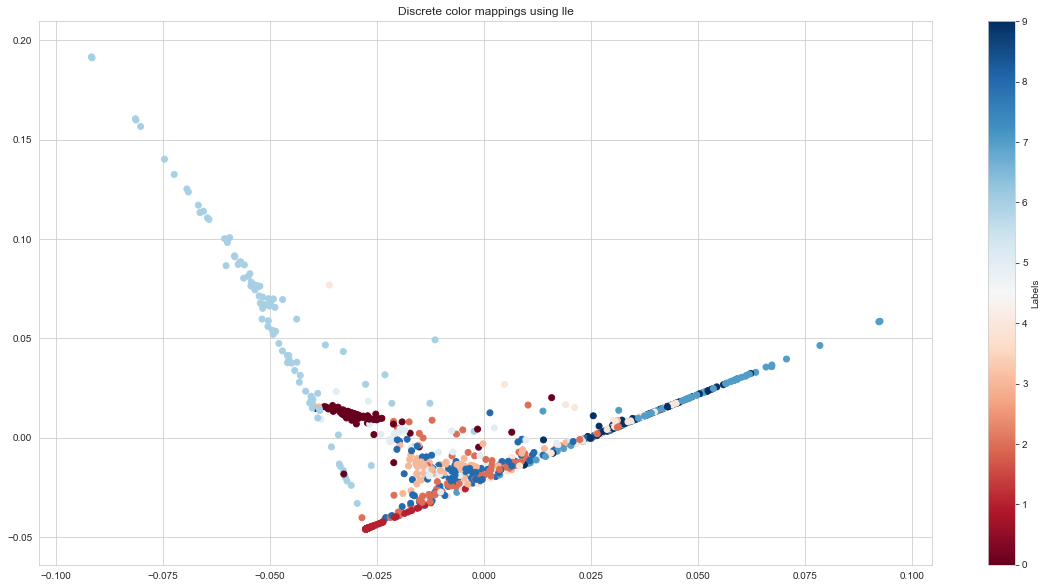

In [22]:
#With matplotlib

for i,j in zip(list_viz,list_viz_str):
    
    # setup the plot
    fig, ax = plt.subplots(1,1, figsize=(20,10))

    # define the data
    x = [x[0] for x in i]
    y = [x[1] for x in i]
    label = [np.int(x) for x in y_1000]
    N = len(np.unique(label)) # Number of labels

    # define the colormap
    cmap = plt.cm.RdBu
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # make the scatter
    scat = ax.scatter(x,y,c=label,cmap=cmap)

    # create the colorbar
    cb = plt.colorbar(scat, spacing='proportional')
    cb.set_label('Labels')
    ax.set_title(f'Discrete color mappings using {j}')
    plt.show()

t-SNE seems to converse better the clusters between the classes!